In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
s = np.loadtxt('pfam_10_20k.txt',dtype='str')
pfam_list = s[:,0]
n_pfam = len(pfam_list)
print(n_pfam)

48


In [4]:
cutoff_list = [2.,3.,4.,5.,6.]
n_cutoff = len(cutoff_list)
auc_DCA = np.zeros((n_cutoff,n_pfam))
auc_LR = np.zeros((n_cutoff,n_pfam))
auc_ER = np.zeros((n_cutoff,n_pfam))

In [5]:
for i,pfam in enumerate(pfam_list):    
    DCA = np.loadtxt('DCA/%s/auc.dat'%pfam)
    LR = np.loadtxt('LR/%s/auc.dat'%pfam)
    ER = np.loadtxt('ER/%s/auc.dat'%pfam)
    
    for j in range(n_cutoff):
        auc_DCA[j,i] = DCA[1,DCA[0,:] == cutoff_list[j]]
        auc_LR[j,i] = LR[1,LR[0,:] == cutoff_list[j]]
        auc_ER[j,i] = ER[1,ER[0,:] == cutoff_list[j]]        

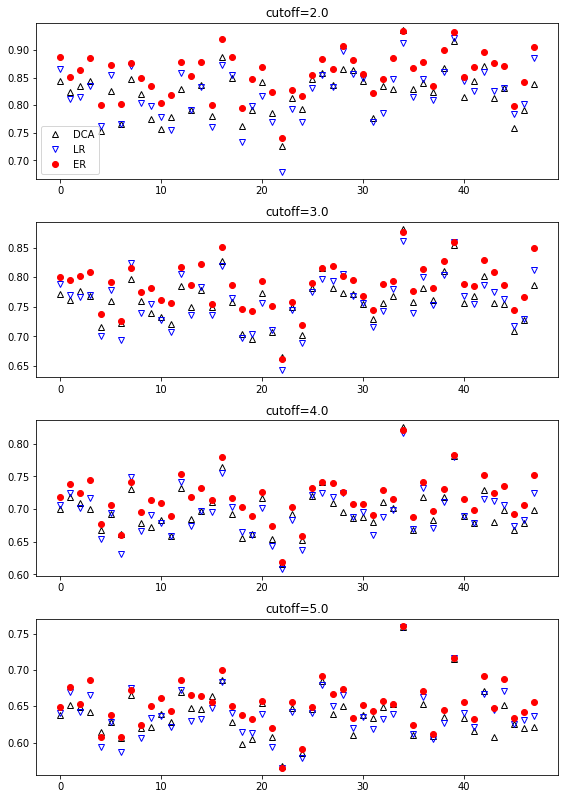

In [6]:
nx,ny = 1,4
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*8,ny*2.8))

for j in range(ny):            
    ax[j].plot(auc_DCA[j,:],'k^',marker='^',mfc='none',label='DCA')
    ax[j].plot(auc_LR[j,:],'bv',marker='v',mfc='none',label='LR')
    ax[j].plot(auc_ER[j,:],'ro',marker='o',label='ER')
    
        #ax[j,i].plot(auc_LR[0,:9],auc_LR[1,:9],'bv--',marker='v',mfc='none',label='LR')
        #ax[j,i].plot(auc_ER[0,1:10],auc_ER[1,1:10],'ro-',label='ER')

        #ax[j,i].plot(auc_DCA[0,1:10],auc_DCA[1,1:10],'k^--',marker='^',mfc='none',label='DCA')
        #ax[j,i].plot(auc_LR[0,:9],auc_LR[1,:9],'bv--',marker='v',mfc='none',label='LR')
        #ax[j,i].plot(auc_ER[0,1:10],auc_ER[1,1:10],'ro-',label='ER')

    ax[j].set_title('cutoff=%s'%cutoff_list[j])
        #ax[j,i].set_xlabel('0: LR , 1: ER')
        #ax[j,i].set_title('%s: %2.2f, %2.2f, %i'%(data_name,acc_LR[t],acc_ER[t],np.sign(acc_ER[t]-acc_LR[t])))
  
    ax[0].legend()
plt.tight_layout(h_pad=1, w_pad=1.5)
plt.savefig('auc_givencutoff_10_20k.pdf', format='pdf', dpi=100)